# Data & Figures for Grey-Loading Paper

In [44]:
day = '1'
month = 'January'
year = '1900'

## Imports and initialization

In [38]:
from CalibrationModules import D1_DacToFreq, TweezerPowerToDepth, MOT_DacToFreq

In [39]:
import numpy as np
from numpy import array as arr
import pandas as pd
import plotly as plt
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True);

In [139]:
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from matplotlib import ticker

%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
#style.use(['dark_background'])
style.use(['default'])

import matplotlib as mpl
### old solarized stuff
# style.use(['dark_background'])
#mpl.rcParams['axes.facecolor'] = '#0a0a0a'
#c = '#111111'
#mpl.rcParams['figure.edgecolor'] = c
#mpl.rcParams['figure.facecolor'] = c

# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
"""
rcParams['figure.figsize'] = (25.0, 8.0)
rcParams['axes.grid'] = True
rcParams['axes.formatter.useoffset'] = False
rcParams['grid.alpha'] = 0.3
rcParams['axes.formatter.limits'] = (-3,3)
# jet is awful.
rcParams['image.cmap'] = 'viridis'
rcParams['figure.dpi'] = 315
# to see all available options, decomment this line.
# print(mpl.rcParams)
rcParams['font.size'] = 14
""";

print(mpl.rcParams)

In [40]:
import math
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [45]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from ExpFile import setPath
import ExpFile as exp
from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc

from importlib import reload
def reloadMyModules():
    reload(exp)
    #setPath(day,month,year, repoAddress="E:\Temporary-Data-Repo")
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)

reloadMyModules()
getVersions()

Version
PrintVersions;            1.0
mainAnalysis:             1.4
AnalysisHelpers:          1.4
bokehPlotters:            1.0
fittingFunctions:         1.0
MarksConstants:           1.0
MarksFourierAnalysis:     1.0
matplotlibPlotters:       1.1
miscellaneous:            1.0
plotlyPlotters:           1.6

# Single Atom

## Red Optimized Loading

In [62]:
reloadMyModules()

Number of Pictures: 2000
Picture Dimensions: 5 x 5
Variaitons: 1
Repetitions: 2000
Experiment started at (H:M:S)  13:10:26:  on (Y-M-D) 2018-8-17
Analyzing Variation... 0, [0.0]


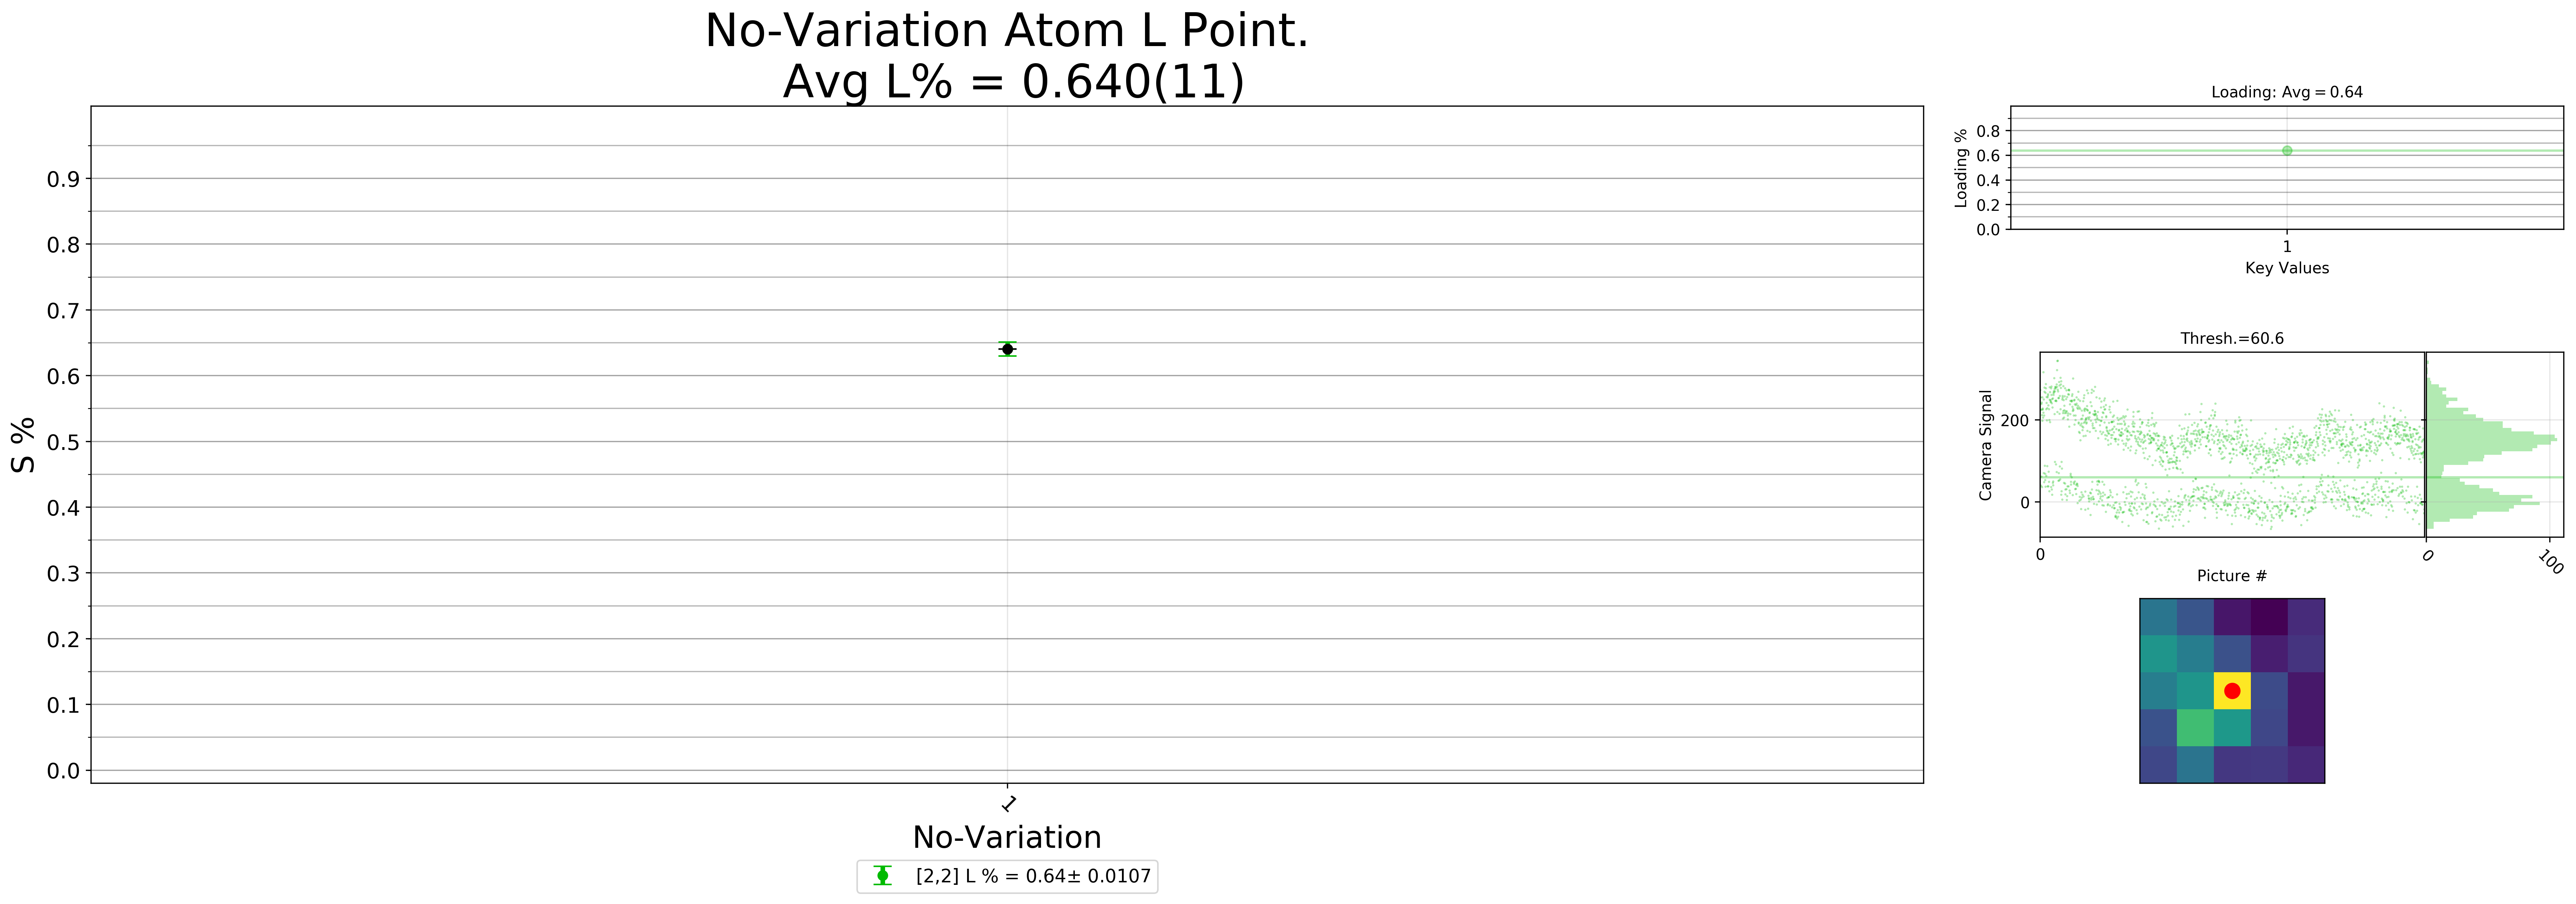

In [67]:
red_optimum_file = 'Single_Atom_Red_Optimized.h5'
mp.Loading(red_optimum_file,[[2,2]], avgColor='k', mainAlpha=1);

## Optimized Loading

### raw data

In [252]:
reloadMyModules()

Number of Pictures: 1000
Picture Dimensions: 5 x 5
Variaitons: 1
Repetitions: 1000
Experiment started at (H:M:S)  18:30:30:  on (Y-M-D) 2018-8-17
Analyzing Variation... 0, [0.0]


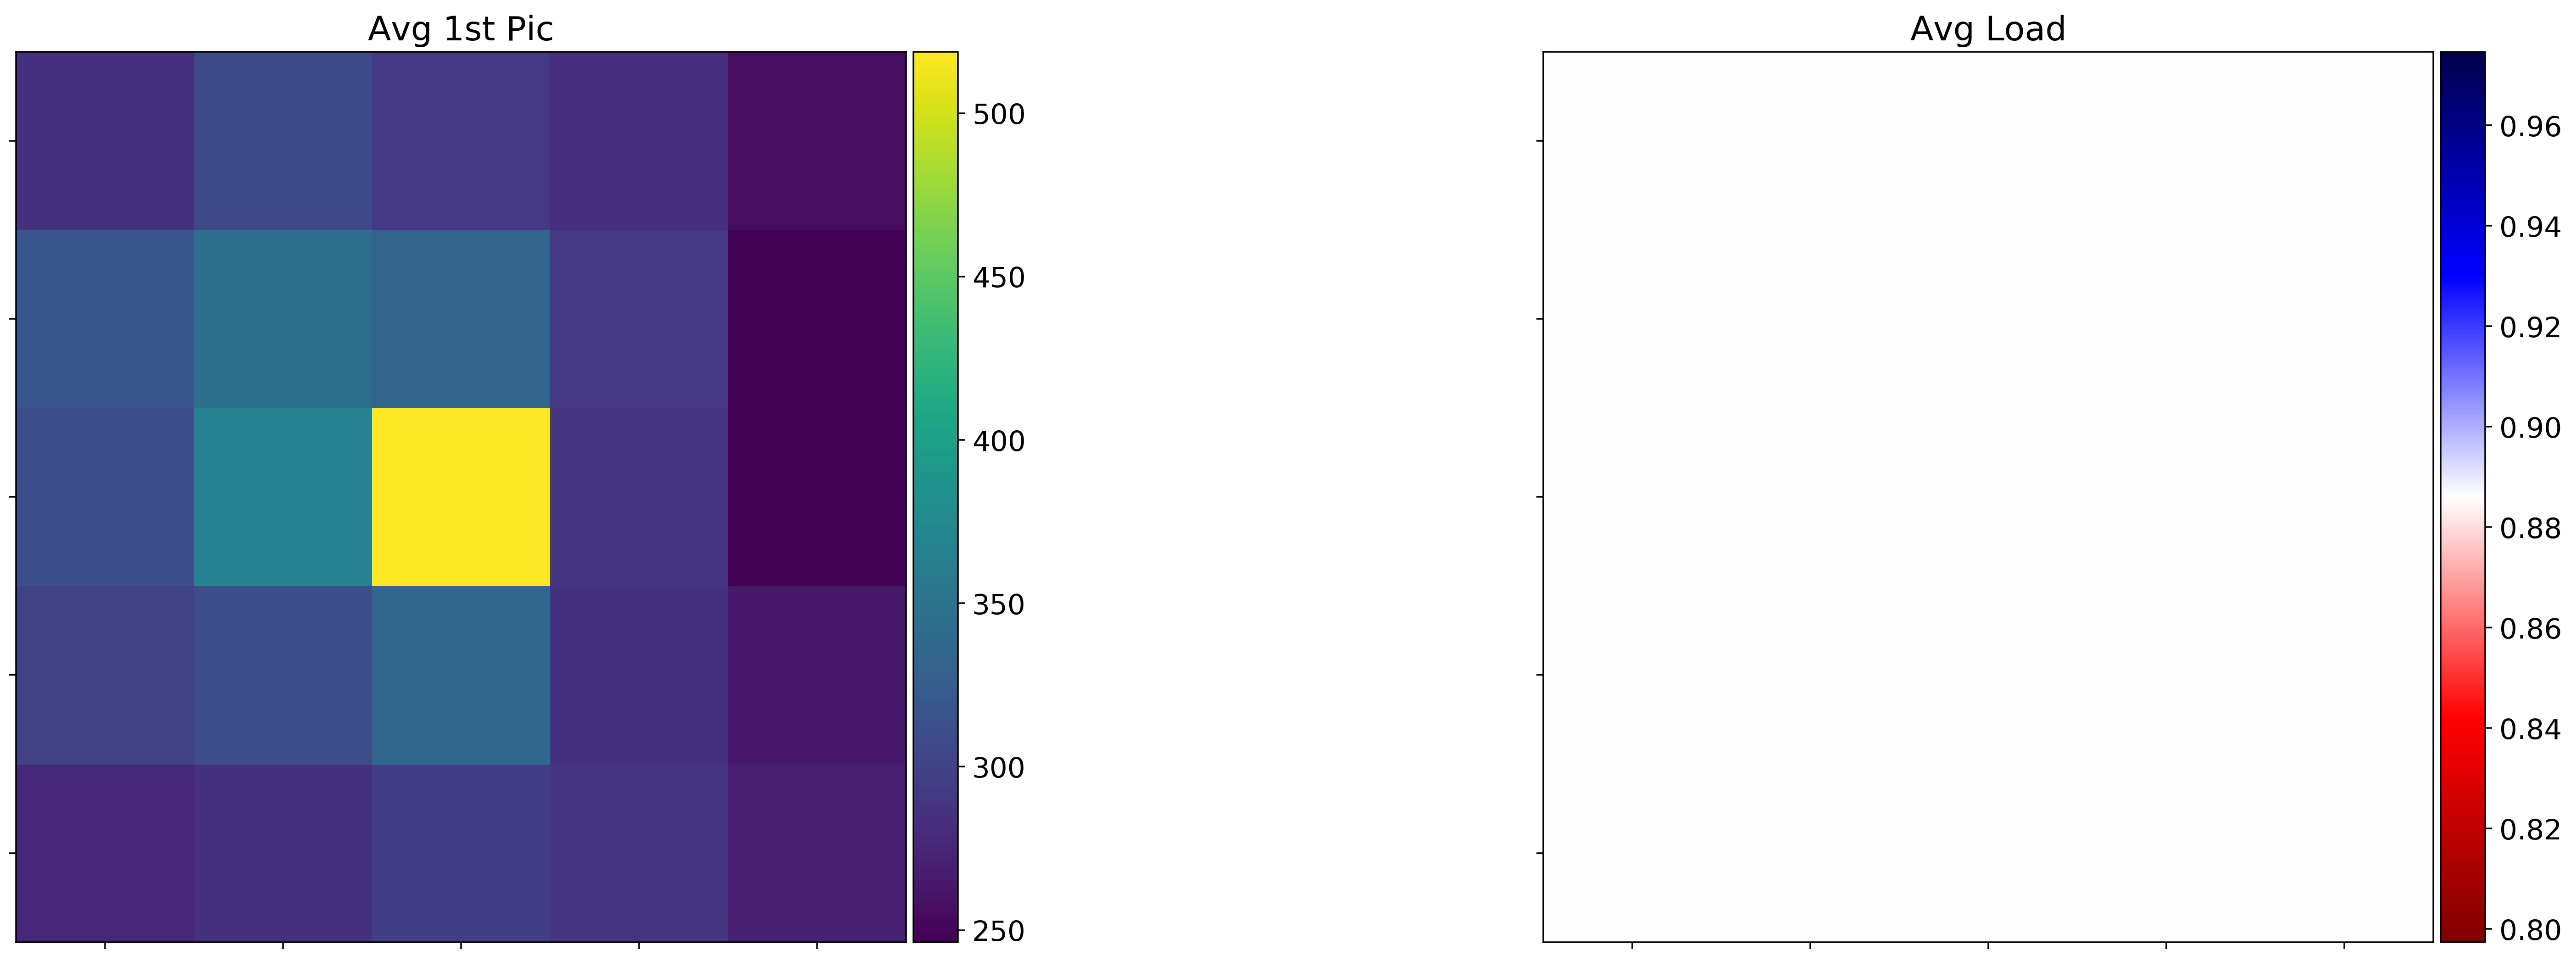

In [69]:
single_optimum_file = 'Single_Atom_Optimized.h5'
res = mp.Loading(single_optimum_file, [[2,2]], manualThreshold=120, avgColor='k', mainAlpha=1);

In [71]:
single_optimum_file = 'Single_Atom_Optimized.h5'
res = mp.Loading(single_optimum_file, [[2,2]], manualThreshold=120, picSlice=[50,1000], avgColor='k', mainAlpha=1);

Number of Pictures: 1000
Picture Dimensions: 5 x 5
Variaitons: 1
Repetitions: 1000
Experiment started at (H:M:S)  18:30:30:  on (Y-M-D) 2018-8-17
Analyzing Variation... 0, [0.0]


### Optimized Loading Video

In [344]:
import imageio
import numpy as np
from numpy import array as arr
import matplotlib as mpl
import matplotlib.cm
from IPython.display import Image, HTML, display

infernoMap = [mpl.cm.inferno(i)[:-1] for i in range(256)]
viridisMap = [mpl.cm.viridis(i)[:-1] for i in range(256)]
hotMap = [mpl.cm.hot(i)[:-1] for i in range(256)]

def makeVid(pics, gifAddress, videoType, fileAddress=None, dur=1, lim=None, includeCount=True, lowLim=None, 
            finLabels=[], finTxt="Atom Reservoir Depleted", vidMap=infernoMap):
    # global count
    # select subsection
    if lim is None:
        lim = len(pics)
    if lowLim is None:
        lowLim = 0
    pics = pics[lowLim:lim]
    # normalize to rgb scale
    pics = pics - min(pics.flatten())
    pics = np.uint16(pics / max(pics.flatten()) * 400)
    pics = arr([[[int(elem) for elem in row] for row in pic] for pic in pics])
    pics = arr(pics-min(pics.flatten()) - 100)
    pics = [[[vidMap[elem] if elem < 256 and elem >= 0 else vidMap[255] if elem >= 256 else vidMap[0] 
              for elem in row] for row in pic] for pic in pics]   
    images = []
    sequenceCount = 1
    offset = 0
    for picCount, pic in enumerate(pics):
        fig = figure()
        fig.set_size_inches([9,9])
        ax = Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        grid(False)
        ax.imshow(pic, aspect='equal')
        ax.text(-0.1, 0.1, str(picCount+1-offset), color='white', fontsize=40)
        if picCount+1 in finLabels:
            ax.text(1.5, 14, finTxt, color='r', fontsize=40)
        name = "temp"+str(picCount+1)+".png"
        savefig(name)
        images.append(imageio.imread(name))
        if picCount+1 in finLabels:
            sequenceCount += 1
            offset = picCount+1
            for _ in range(4):
                images.append(imageio.imread(name))
        close('all')
    # make bigger
    pics = [np.repeat(np.repeat(pic,32, axis=0), 32, axis=1) for pic in pics]
    imageio.mimsave(gifAddress, images, format=videoType, duration=dur)


In [345]:
makeVid(res['Raw_Data'][50:150], 'Optimized_Single_Atom.gif', 'gif',dur=0.3);

## Single-Atom Grey Molasses Detuning & Trap Depth Vs Loading

### option 1

In [117]:
grey_mol_file = 'Grey_Molasses_Loading.h5'

In [186]:
alt_grey_mol_file = 'Alt_Grey_Molasses_Loading.h5'

#### Raw Data

Number of Pictures: 72600
Picture Dimensions: 5 x 5
Variaitons: 484
Repetitions: 150
Experiment started at (H:M:S)  22:15:24:  on (Y-M-D) 2018-8-17
Analyzing Variation... 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

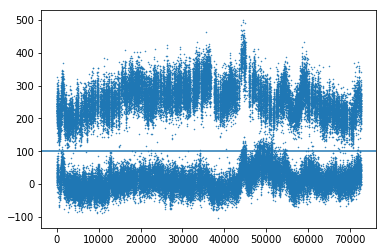

In [130]:
res = ma.standardPopulationAnalysis( grey_mol_file, [[2,2]], 0, 1 );
( fullPixelCounts, thresholds, avgPic, key, avgLoadingErr, avgLoading, allLoadingRate, allLoadingErr, loadFits,
             fitModule, keyName, totalAtomData, rawData, atomLocations, avgFits, atomImages, threshFitVals, _,_,_ ) = res
plot(fullPixelCounts[0], '.', markersize=1)
axhline(thresholds[0]);

##### Final

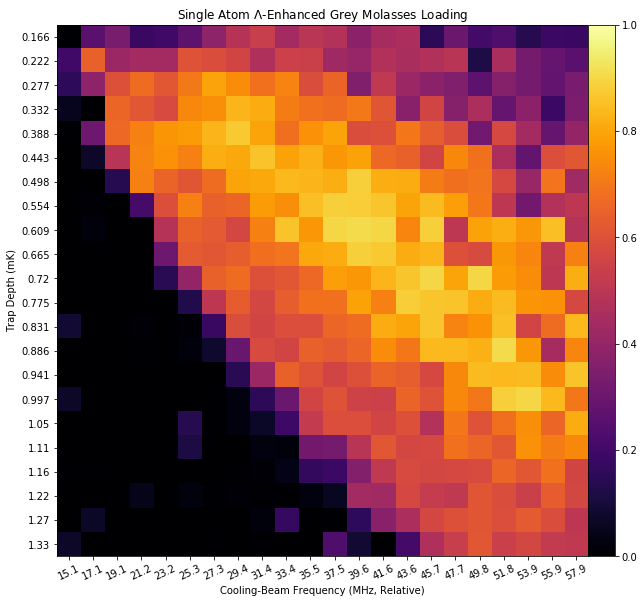

In [148]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=25);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('Single Atom $\Lambda$-Enhanced Grey Molasses Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');

#cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.01)
#tick_locator = ticker.MaxNLocator(nbins=20)
#cb.locator = tick_locator
#cb.update_ticks()

##### value image

In [122]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f, ax = subplots(1,2, figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
    ax[1].text(i1-0.5, i2+0.25, misc.round_sig(avgLoading[0][i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avgLoadingErr[0][i],2), fontsize=6, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='viridis', vmin=0, vmax=1)
    grid()
    xlabel('Cooling-Beam Frequency (MHz, Relative)')
    ylabel('Trap Depth (mK)')
    #xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
    #yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

#### Optimizing Thresholds

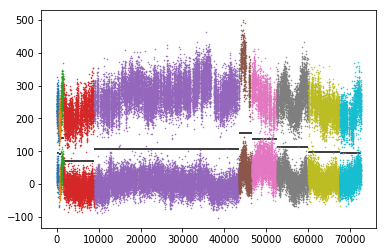

In [263]:
repsPerVar = 150
borders = [0,4,7,11,60,290,310,350,400,450,500]
errs, pixels, thresh, data = [[None for _ in range(len(borders)-1)] for _ in range(4)]
for bi in range(len(borders)-1):
    begin, end = borders[bi:bi+2]
    res = ma.standardPopulationAnalysis(grey_mol_file, [[2,2]], 0, 1, dataRange=np.arange(begin,end),
                                        picSlice=[begin*repsPerVar,repsPerVar*end], quiet=True);
    errs[bi], thresh[bi], pixels[bi], data[bi] = res[4][0], res[1][0], res[0][0], res[5][0]
x_i = 0
for p, t in zip(pixels, thresh):
    plot(np.arange(x_i, x_i + len(p)), p, '.', markersize=1)
    hlines(t, xmin=x_i, xmax=x_i + len(p),color='k')
    x_i += len(p)

##### Final

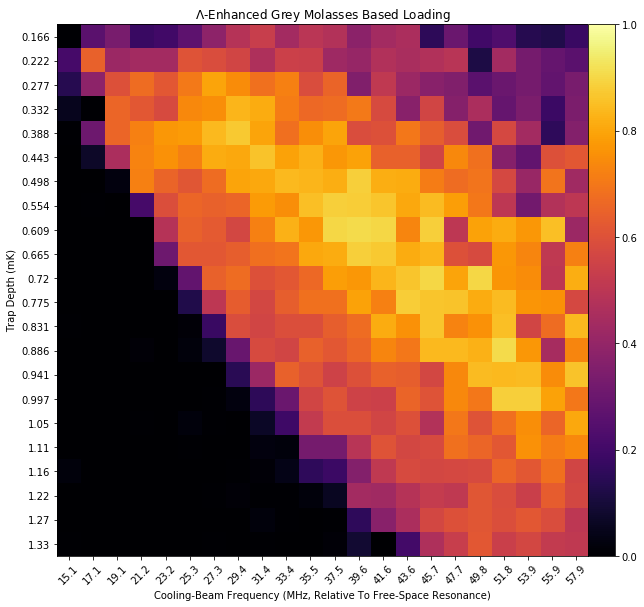

In [266]:
with exp.ExpFile(grey_mol_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for e, l in zip(errs, data):
    avg_combined += l
    errsCombined += e
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative To Free-Space Resonance)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('$\Lambda$-Enhanced Grey Molasses Based Loading');
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Orig_Lambda-Enhanced_Grey_Molasses_Based_Loading.png')

##### Value Image

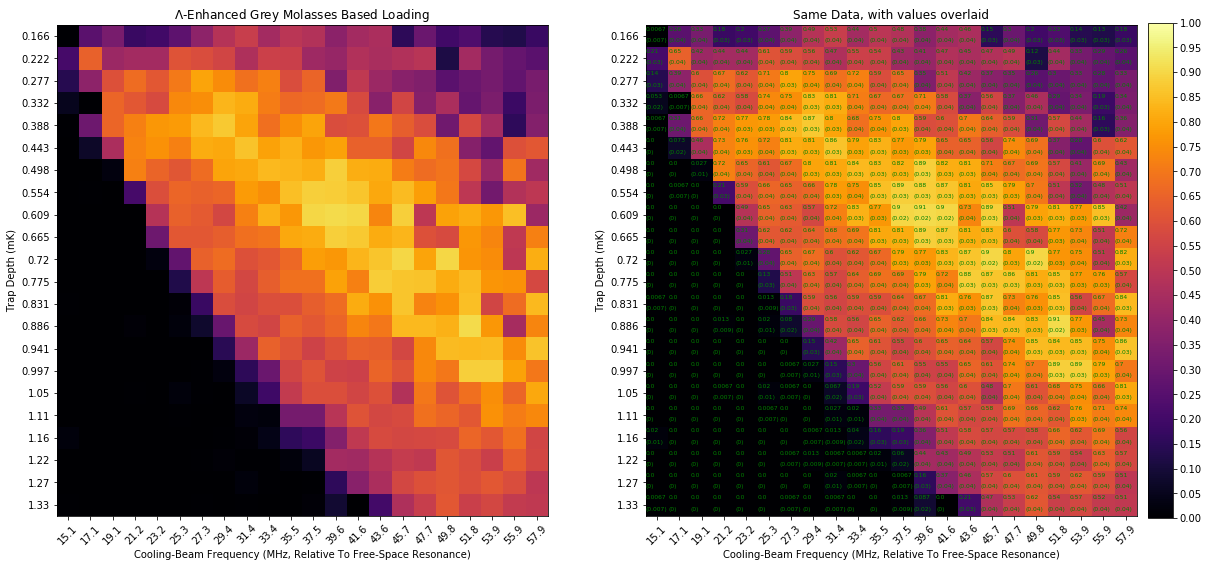

In [265]:
with exp.ExpFile(grey_mol_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for e, l in zip(errs, data):
    avg_combined += l
    errsCombined += e
f, ax = subplots(1,2,figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '(' + misc.round_sig_str(errsCombined[i],1) + ')', fontsize=6, color='g')
    
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative To Free-Space Resonance)')
    ylabel('Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('$\Lambda$-Enhanced Grey Molasses Based Loading');
ax[1].set_title('Same Data, with values overlaid');

cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0222, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

### Option 2

In [257]:
res = ma.standardPopulationAnalysis( alt_grey_mol_file, [[2,2]], 0, 1 );
( fullPixelCounts, thresholds, avgPic, key, avgLoadingErr, avgLoading, allLoadingRate, allLoadingErr, loadFits,
             fitModule, keyName, totalAtomData, rawData, atomLocations, avgFits, atomImages, threshFitVals, _,_,_ ) = res
plot(fullPixelCounts[0], '.', markersize=1)
axhline(thresholds[0]);

Number of Pictures: 58080
Picture Dimensions: 5 x 5
Variaitons: 484
Repetitions: 120
Experiment started at (H:M:S)  3:53:31:  on (Y-M-D) 2018-8-26


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



Analyzing Variation... 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

##### Final

In [258]:
from matplotlib.pyplot import *

In [259]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=25);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('Single Atom $\Lambda$-Enhanced Grey Molasses Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Alt-Single Atom $\Lambda$-Enhanced Grey Molasses Loading')
#cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.01)
#tick_locator = ticker.MaxNLocator(nbins=20)
#cb.locator = tick_locator
#cb.update_ticks()

FileNotFoundError: [Errno 2] No such file or directory: 'Alt-Single Atom $\\Lambda$-Enhanced Grey Molasses Loading.png'

##### value image

In [ ]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f, ax = subplots(1,2, figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
    ax[1].text(i1-0.5, i2+0.25, misc.round_sig(avgLoading[0][i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avgLoadingErr[0][i],2), fontsize=6, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='viridis', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative)')
    ylabel('Trap Depth (mK)')
    #xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
    #yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

#### Optimizing Thresholds

In [260]:
repsPerVar = 120
borders = [0,11,23,32,42,52,62,80,110,120,160,175,190,260,280,310,340,400,450,500]
errs, pixels, thresh, data = [[None for _ in range(len(borders)-1)] for _ in range(4)]
for bi in range(len(borders)-1):
    begin, end = borders[bi:bi+2]
    res = ma.standardPopulationAnalysis(alt_grey_mol_file, [[2,2]], 0, 1, dataRange=np.arange(begin,end),
                                        picSlice=[begin*repsPerVar,repsPerVar*end], quiet=True);
    errs[bi], thresh[bi], pixels[bi], data[bi] = res[4][0], res[1][0], res[0][0], res[5][0]
x_i = 0
figure(figsize=(20,10))
for p, t in zip(pixels, thresh):
    plot(np.arange(x_i, x_i + len(p)), p, '.', markersize=1)
    hlines(t, xmin=x_i, xmax=x_i + len(p),color='k')
    x_i += len(p)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



##### Final

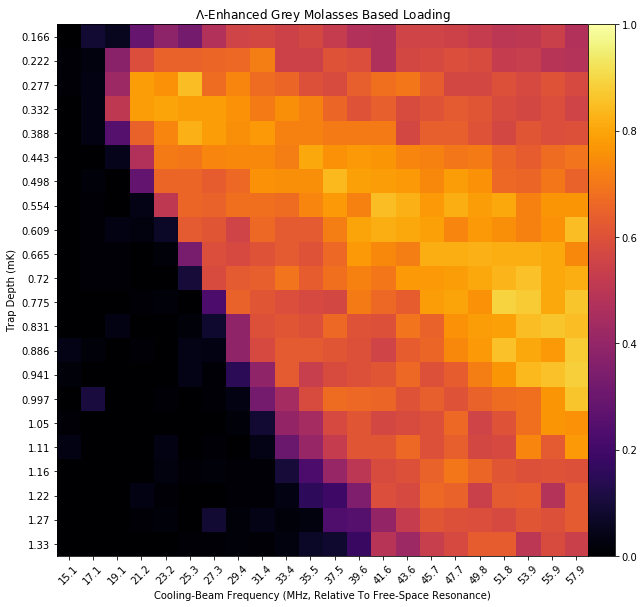

In [261]:
with exp.ExpFile(alt_grey_mol_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for e, l in zip(errs, data):
    avg_combined += l
    errsCombined += e
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative To Free-Space Resonance)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('$\Lambda$-Enhanced Grey Molasses Based Loading');
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Alt-Single-Atom_Lambda-Enhanced_Grey_Molasses_Based_Loading.png')

##### Value Image

In [220]:
with exp.ExpFile(alt_grey_mol_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for e, l in zip(errs, data):
    avg_combined += l
    errsCombined += e
f, ax = subplots(1,2,figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '(' + misc.round_sig_str(errsCombined[i],1) + ')', fontsize=6, color='g')
    
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative To Free-Space Resonance)')
    ylabel('Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('$\Lambda$-Enhanced Grey Molasses Based Loading');
ax[1].set_title('Same Data, with values overlaid');

cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0222, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

## Single-Atom Red PGC Detuning & Trap Depth Vs Loading

In [155]:
red_pgc_file = 'Red_Pgc_Loading.h5'

### Raw Data

In [223]:
res = ma.standardPopulationAnalysis( red_pgc_file, [[2,2]], 0, 1 );
( fullPixelCounts, thresholds, avgPic, key, avgLoadingErr, avgLoading, allLoadingRate, allLoadingErr, loadFits,
             fitModule, keyName, totalAtomData, rawData, atomLocations, avgFits, atomImages, threshFitVals, totalavg, totalErr, threshFids ) = res
plot(fullPixelCounts[0], '.', markersize=1)
axhline(thresholds[0]);

Number of Pictures: 72600
Picture Dimensions: 5 x 5
Variaitons: 484
Repetitions: 150
Experiment started at (H:M:S)  13:53:31:  on (Y-M-D) 2018-8-18
Analyzing Variation... 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

#### final

In [224]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f = figure(figsize=(10,10))

for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
    
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative to free-space resonance)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('Standard Red PGC Based Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');


#### value image

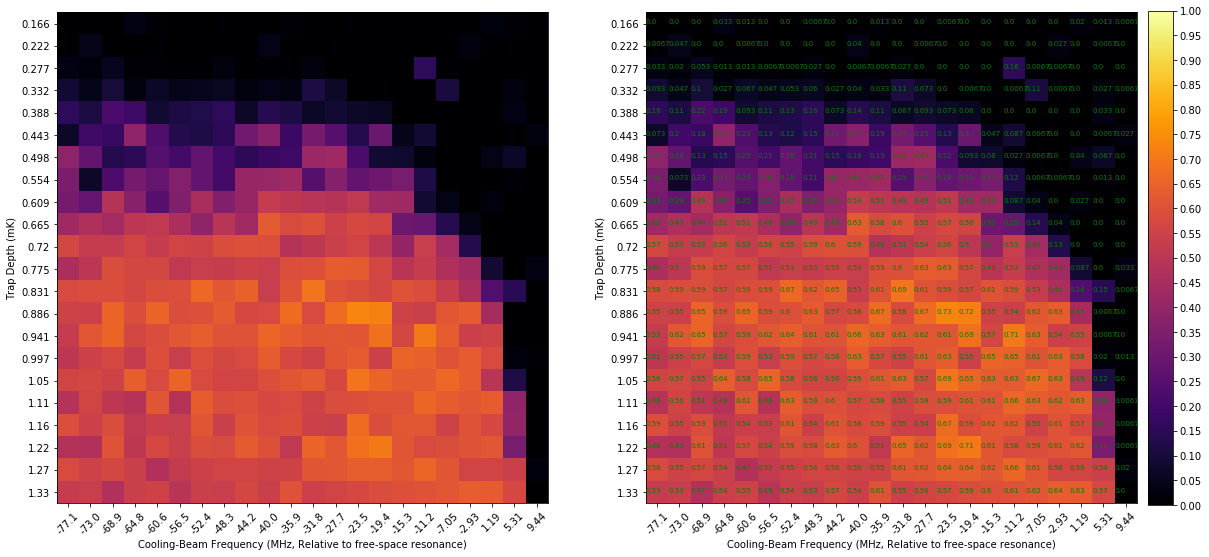

In [225]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1),len(key2)))
f, ax = subplots(1,2, figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avgLoading[0][i]
    ax[1].text(i1-0.5, i2, misc.round_sig(avgLoading[0][i],2), fontsize=7, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative to free-space resonance)')
    ylabel('Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.02215, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

### Optimizing Thresholds

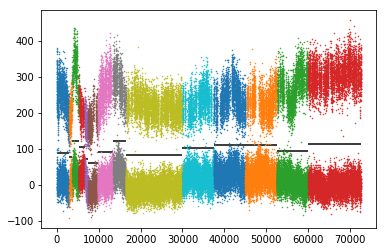

In [246]:
repsPerVar = 150
borders = [0,20,25,35,45, 50, 65, 90, 110, 200,250,300,350,400,650]
errs, pixels, thresh, data = [[None for _ in range(len(borders)-1)] for _ in range(4)]
for bi in range(len(borders)-1):
    begin, end = borders[bi:bi+2]
    res = ma.standardPopulationAnalysis(red_pgc_file, [[2,2]], 0, 1, dataRange=np.arange(begin,end),
                                        picSlice=[begin*repsPerVar,repsPerVar*end], quiet=True);
    errs[bi], thresh[bi], pixels[bi], data[bi] = res[4][0], res[1][0], res[0][0], res[5][0]
x_i = 0
for p, t in zip(pixels, thresh):
    plot(np.arange(x_i, x_i + len(p)), p, '.', markersize=1)
    hlines(t, xmin=x_i, xmax=x_i + len(p), color='k')
    x_i += len(p)

#### final

In [255]:
y = [[1,2,3],[1,2,3],[1,2,3]]
x = [x for i in y for x in i]
print(x)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


In [249]:
with exp.ExpFile(red_pgc_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
avg_combined = arr(data).flatten()

errsCombined = arr(errs).flatten()
#for l, e in zip(data, errs):    
#    avg_combined += l
#    errsCombined += e
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '('+misc.round_sig_str(errsCombined[i],1)+')', fontsize=6, color='g')
    
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('Red PGC Based Loading');
ax[1].set_title('Same Data, with values overlaid');

title('Standard Red PGC Based Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Single-Atom_Standard_Red_PGC_Based_Loading.png')

ValueError: setting an array element with a sequence.

<Figure size 720x720 with 0 Axes>

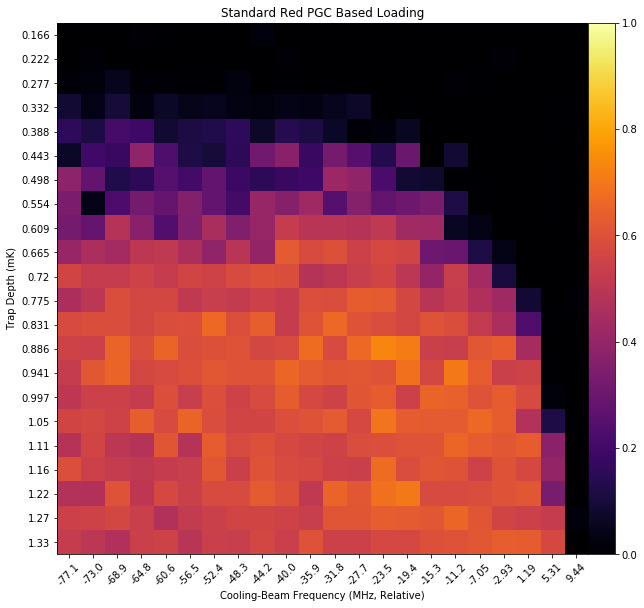

In [227]:
with exp.ExpFile(red_pgc_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
avg_combined = data.flatten()
errsCombined = errs.flatten()
#for l, e in zip(data, errs):    
#    avg_combined += l
#    errsCombined += e
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '('+misc.round_sig_str(errsCombined[i],1)+')', fontsize=6, color='g')
    
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('Red PGC Based Loading');
ax[1].set_title('Same Data, with values overlaid');

title('Standard Red PGC Based Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Single-Atom_Standard_Red_PGC_Based_Loading.png')

#### value image

In [228]:
with exp.ExpFile(red_pgc_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for l, e in zip(data, errs):    
    avg_combined += l
    errsCombined += e
f, ax = subplots(1,2,figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '('+misc.round_sig_str(errsCombined[i],1)+')', fontsize=6, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative)')
    ylabel('Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('Red PGC Based Loading');
ax[1].set_title('Same Data, with values overlaid');

cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()


# 100 Atoms

## Detuning & Trap Depth Vs. Loading

In [167]:
from CalibrationModules import TweezerPowerToDepth, D1_DacToFreq
from matplotlib import ticker

In [168]:
grey_mol_file_10x10 = '10x10_Grey_Molasses_Loading.h5'

In [169]:
res = ma.standardPopulationAnalysis( grey_mol_file_10x10, [3,2,2,10,10], 0, 1);
( fullPixelCounts, thresholds, avgPic, key, avgLoadingErr, avgLoading, allLoadingRate, allLoadingErr, loadFits,
  fitModule, keyName, totalAtomData, rawData, atomLocations, avgFits, atomImages, threshFitVals, totalAvg, totalErr, threshFids) = res

Number of Pictures: 48400
Picture Dimensions: 25 x 23
Variaitons: 484
Repetitions: 100
Experiment started at (H:M:S)  21:8:11:  on (Y-M-D) 2018-8-23
Analyzing Variation... 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187

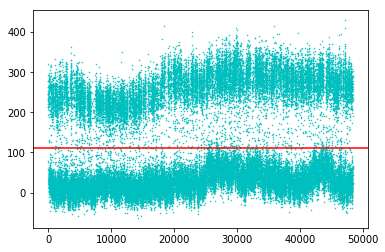

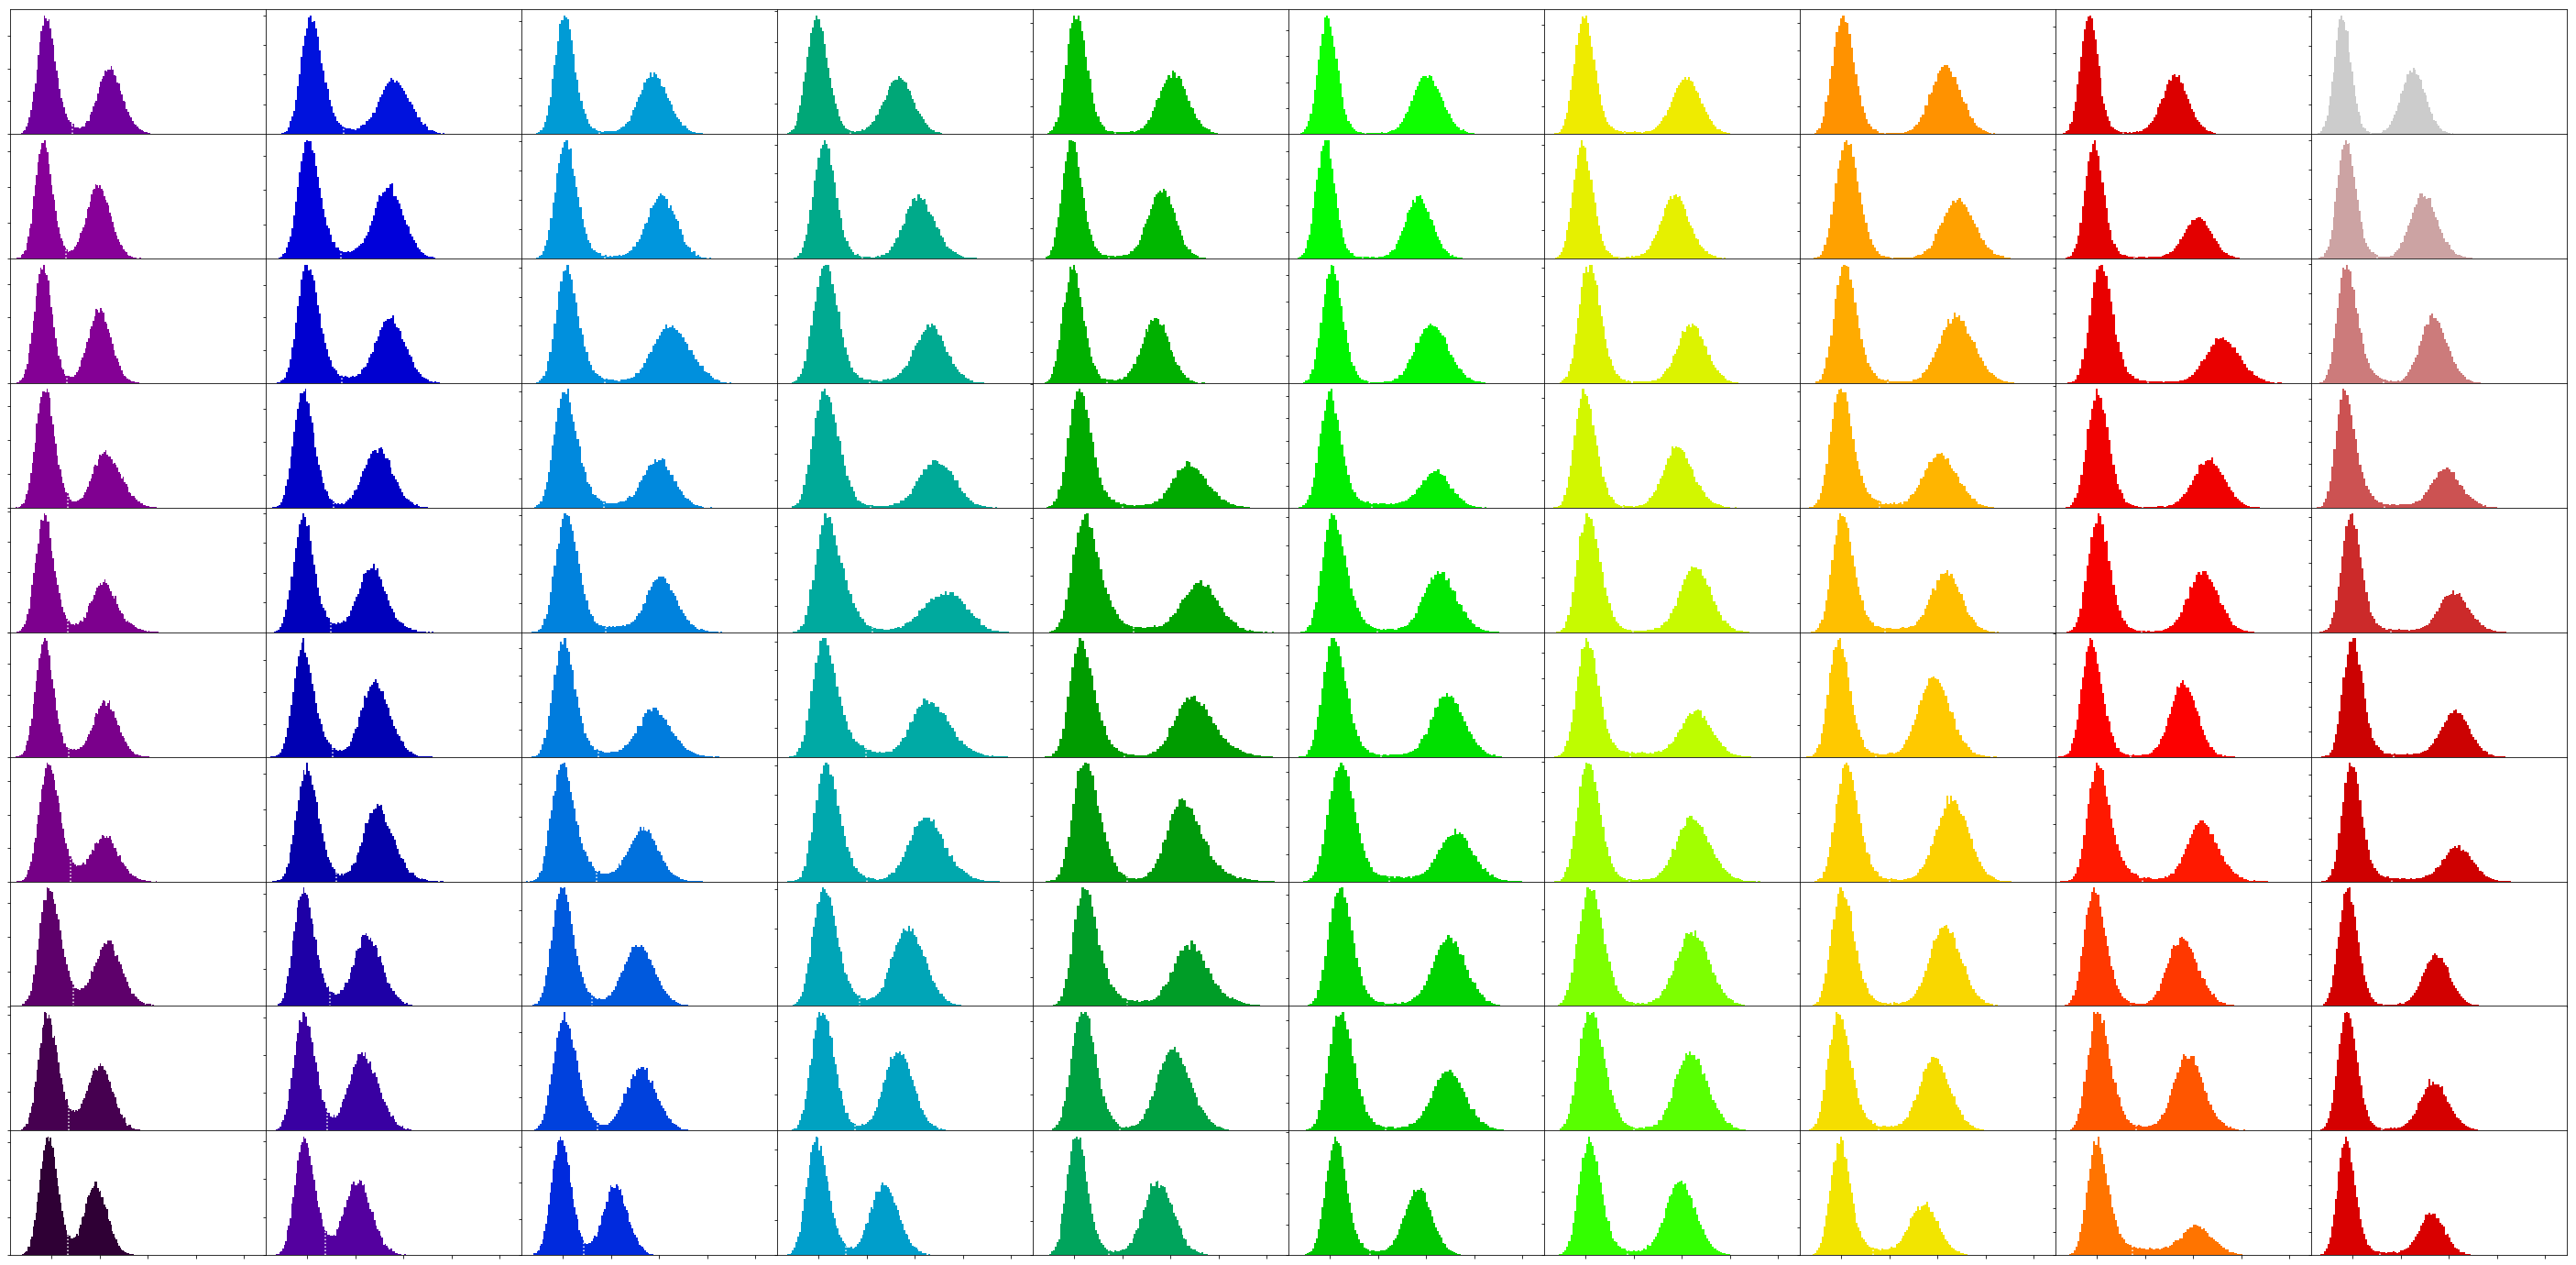

In [170]:
plot(fullPixelCounts[35], '.c', markersize=1)
axhline(thresholds[35], color='r');
colors,_ = misc.getColors(101);
mp.indvHists(fullPixelCounts, thresholds, colors);

In [173]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
# we couldn't actually supply powers above ~205mw at this point,
# so the points beyond this are probably misleading.
key2 = [k for k in key2 if k <= 205]

In [96]:
from matplotlib.pyplot import *

### Raw Analysis

#### Final

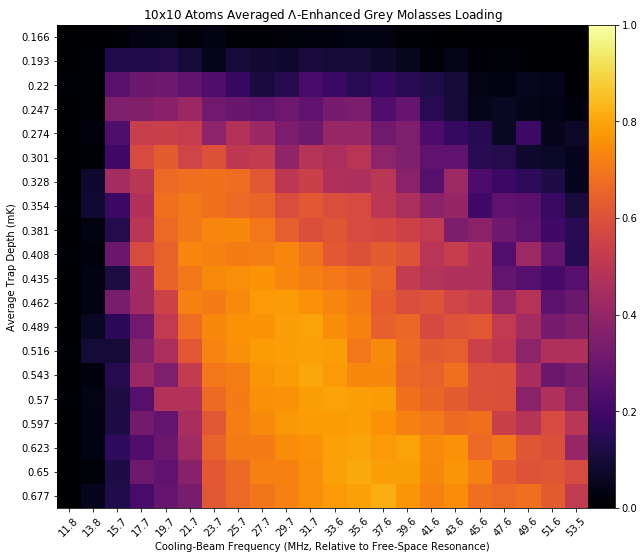

In [176]:
avgAvgLoading = [np.mean(atmLoads) for atmLoads in misc.transpose(avgLoading)]
im_2dscan = np.zeros((len(key2),len(key1)))
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    try:
        i1 = np.where(key1==keyVal[0])[0][0]
        i2 = np.where(key2==keyVal[1])[0][0]
    except IndexError:
        # happens when the loop finds a key with a power that is being discarded.
        continue
    im_2dscan[i2,i1] = avgAvgLoading[i]

im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative to Free-Space Resonance)')
ylabel('Average Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k/100)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('10x10 Atoms Averaged $\Lambda$-Enhanced Grey Molasses Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');

#### Value Image

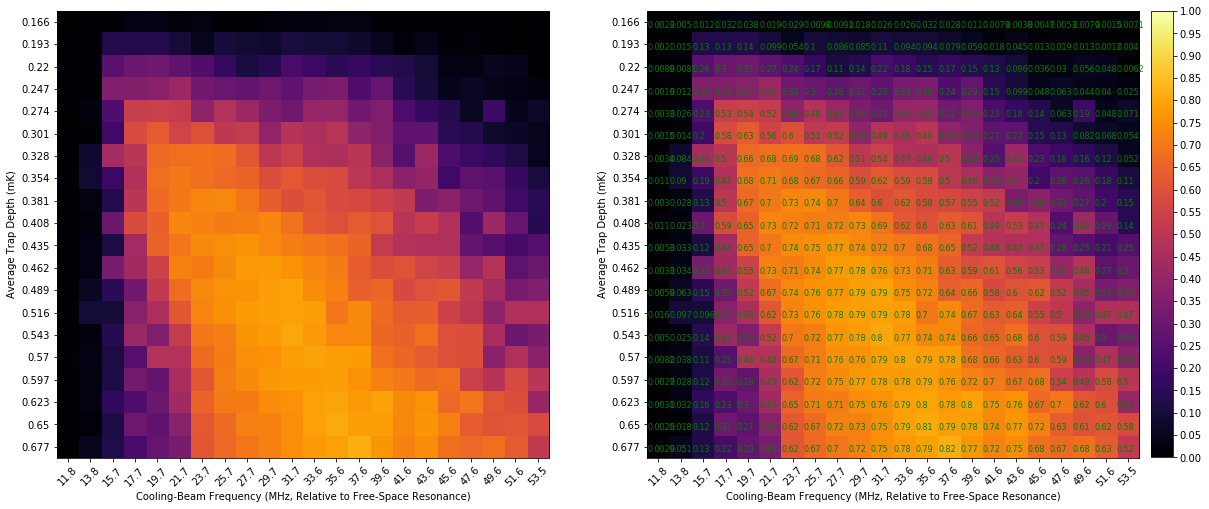

In [103]:
avgAvgLoading = [np.mean(atmLoads) for atmLoads in misc.transpose(avgLoading)]
im_2dscan = np.zeros((len(key2),len(key1)))
f, ax = subplots(1,2, figsize=(20,40))
for i, keyVal in enumerate(key):
    try:
        i1 = np.where(key1==keyVal[0])[0][0]
        i2 = np.where(key2==keyVal[1])[0][0]
    except IndexError:
        # happens when the loop finds a key with a power that is being discarded.
        continue
    im_2dscan[i2,i1] = avgAvgLoading[i]
    ax[1].text(i1-0.5, i2+0.25, misc.round_sig(avgAvgLoading[i], 2), fontsize=8, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative to Free-Space Resonance)')
    ylabel('Average Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k/100)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.02, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

#### individual atoms

In [184]:
fig = figure(figsize=(20,20))
grid = axesTool.AxesGrid( fig, 111, nrows_ncols=(10, 10), axes_pad=0.0, share_all=True,
                          label_mode="L", cbar_location="right", cbar_mode="single" )
for atomInc in range(100):
    num = 100 - 10*((atomInc % 10)+1) + atomInc // 10
    ax = grid[num]
    im_2dscan = np.zeros((len(key2),len(key1)))
    for i, keyVal in enumerate(key):
        try:            
            i1 = np.where(key1==keyVal[0])[0][0]
            i2 = np.where(key2==keyVal[1])[0][0]
        except IndexError:
            # happens when the loop finds a key with a power that is being discarded.
            continue
        im_2dscan[i2,i1] = avgLoading[atomInc][i]
    ax.grid(False)
    sca(ax)
    xticks([],[])
    yticks([],[])
    ax.axis('on')
    im = ax.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    ax.grid(False)

grid.cbar_axes[0].colorbar(im);


In [127]:
f, axs = subplots(10,10, figsize=(21,18.2))#, sharex=True, sharey=True)
subplots_adjust(wspace=0, hspace=0)
for atomInc in range(100):
    ax = axs[len(axs[0]) - atomInc%len(axs[0]) - 1][int(atomInc/len(axs))]
    ax.set_adjustable('box')
    im_2dscan = np.zeros((len(key2),len(key1)))
    for i, keyVal in enumerate(key):
        try:            
            i1 = np.where(key1==keyVal[0])[0][0]
            i2 = np.where(key2==keyVal[1])[0][0]
        except IndexError:
            # happens when the loop finds a key with a power that is being discarded.
            continue
        im_2dscan[i2,i1] = avgLoading[atomInc][i]
    ax.grid(False)
    sca(ax)
    xticks([],[])
    yticks([],[])
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.axis('on')
    im = ax.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    ax.grid(False)
cb = colorbar(im, ax=axs.ravel().tolist(),fraction=0.043, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()


In [108]:
maxData = []
for atomLoc in range(100):
    maxData.append(max(avgLoading[atomLoc]))
maxData = [maxData[i] if maxData[i] is not None else np.mean([i for i in maxData if i is not None]) for i in range(len(maxData))] 
print(np.mean(maxData))

0.8898


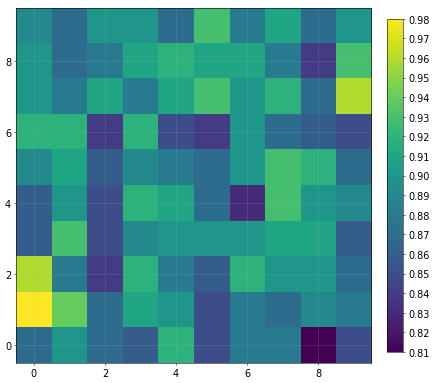

In [109]:
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
figure(figsize=(10,10), dpi=50)
im = imshow(misc.transpose(np.reshape(maxData,(10,10))), origin='bottom')
cb = colorbar(im, ax=gca(),fraction=0.043, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()

### Optimizing Thresholds

In [229]:
with exp.ExpFile(grey_mol_file_10x10) as f:
    f.get_basic_info()

Number of Pictures: 48400
Picture Dimensions: 25 x 23
Variaitons: 484
Repetitions: 100
Experiment started at (H:M:S)  21:8:11:  on (Y-M-D) 2018-8-23


In [ ]:
repsPerVar = 100
borders = [int(x) for x in np.linspace(0,484,20)]
errs, pixels, thresh, data = [[[None for _ in range(len(borders)-1)] for _ in range(100)] for _ in range(4)]
for bi in range(len(borders)-1):
    begin, end = borders[bi:bi+2]
    res = ma.standardPopulationAnalysis(grey_mol_file_10x10, [3,2,2,10,10], 0, 1, dataRange=np.arange(begin,end),
                                        picSlice=[begin*repsPerVar,repsPerVar*end], quiet=True);
    for ai in range(100):
        errs[ai][bi], thresh[ai][bi], pixels[ai][bi], data[ai][bi] = res[4][ai], res[1][ai], res[0][ai], res[5][ai]


In [245]:
figure(figsize=(20,5))
for ai in range(100):
    x_i = 0
    for p, t in zip(pixels[ai], thresh[ai]):
        plot(np.arange(x_i, x_i + len(p)), p, '.', markersize=1)
        hlines(t, xmin=x_i, xmax=x_i + len(p), color='k')
        x_i += len(p)

#### final

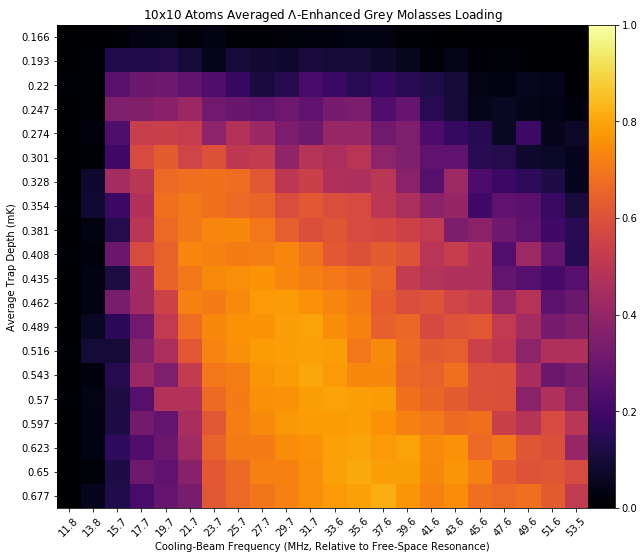

In [176]:
avgAvgLoading = [np.mean(atmLoads) for atmLoads in misc.transpose(avgLoading)]
im_2dscan = np.zeros((len(key2),len(key1)))
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    try:
        i1 = np.where(key1==keyVal[0])[0][0]
        i2 = np.where(key2==keyVal[1])[0][0]
    except IndexError:
        # happens when the loop finds a key with a power that is being discarded.
        continue
    im_2dscan[i2,i1] = avgAvgLoading[i]

im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative to Free-Space Resonance)')
ylabel('Average Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(D1_DacToFreq.f(k)) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k/100)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])
title('10x10 Atoms Averaged $\Lambda$-Enhanced Grey Molasses Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');

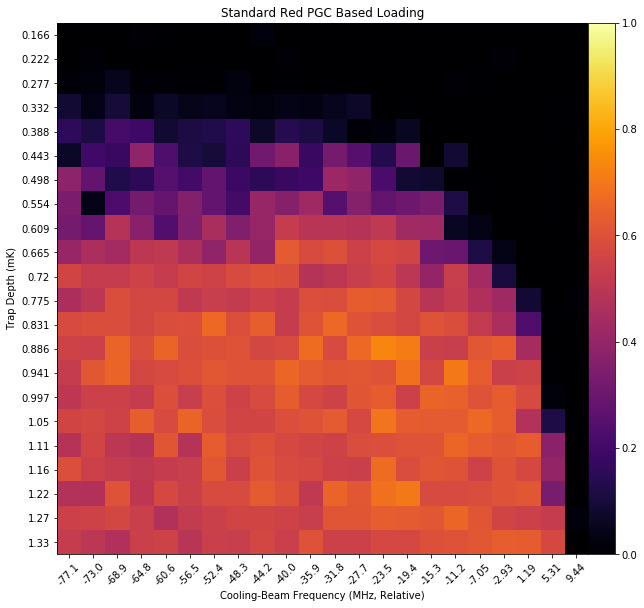

In [227]:
with exp.ExpFile(grey_mol_file_10x10) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for l, e in zip(data, errs):    
    avg_combined += l
    errsCombined += e
f = figure(figsize=(10,10))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '('+misc.round_sig_str(errsCombined[i],1)+')', fontsize=6, color='g')
    
im = imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
grid(False)
xlabel('Cooling-Beam Frequency (MHz, Relative)')
ylabel('Trap Depth (mK)')
xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
#xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
#yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('Red PGC Based Loading');
ax[1].set_title('Same Data, with values overlaid');

title('Standard Red PGC Based Loading')
divider = axesTool.make_axes_locatable(gca())
cax = divider.append_axes('right', size='5%', pad=0.0)
f.colorbar(im, cax, orientation='vertical');
savefig('Single-Atom_Standard_Red_PGC_Based_Loading.png')

#### value image

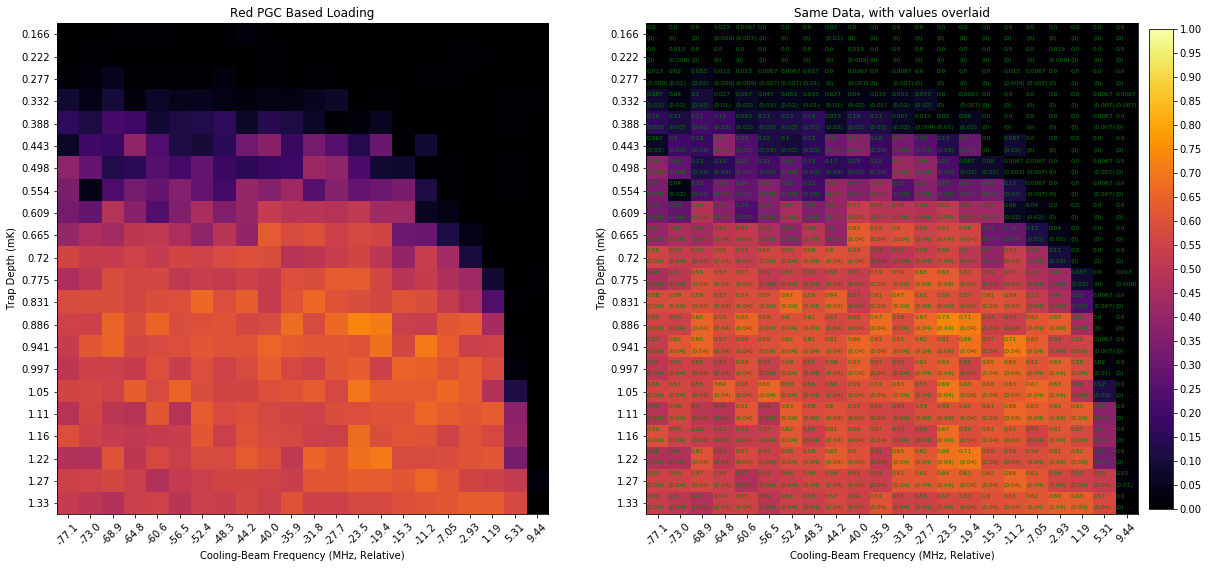

In [228]:
with exp.ExpFile(red_pgc_file) as f:
    kn, key = f.get_key()
key1, key2 = key[:,0], key[:,1]
key1 = np.sort(np.unique(key1))
key2 = np.sort(np.unique(key2))
im_2dscan = np.zeros((len(key1), len(key2)))
avg_combined = []
errsCombined = []
for l, e in zip(data, errs):    
    avg_combined += l
    errsCombined += e
f, ax = subplots(1,2,figsize=(20,40))
for i, keyVal in enumerate(key):
    i1 = np.where(key1==keyVal[0])[0][0]
    i2 = np.where(key2==keyVal[1])[0][0]
    im_2dscan[i2,i1] = avg_combined[i]
    ax[1].text(i1-0.5, i2-0.25, misc.round_sig(avg_combined[i],2), fontsize=6, color='g')
    ax[1].text(i1-0.5, i2+0.25, '('+misc.round_sig_str(errsCombined[i],1)+')', fontsize=6, color='g')
for a in ax:
    sca(a)
    im = a.imshow(im_2dscan, cmap='inferno', vmin=0, vmax=1)
    grid(False)
    xlabel('Cooling-Beam Frequency (MHz, Relative)')
    ylabel('Trap Depth (mK)')
    xticks(range(len(key1)),[misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1],rotation=45);
    yticks(range(len(key2)),[misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]);
    #xticks(range(len(key1)),[misc.round_sig(k) for k in key1], rotation=50)
    #yticks(range(len(key2)),[misc.round_sig(k) for k in key2])

ax[0].set_title('Red PGC Based Loading');
ax[1].set_title('Same Data, with values overlaid');

cb = colorbar(im, ax=ax.ravel().tolist(), fraction=0.0215, pad=0.01)
tick_locator = ticker.MaxNLocator(nbins=20)
cb.locator = tick_locator
cb.update_ticks()
